# EXPLORATORY DATA ANALYST 
<p> Notre dataset est relative  à l'octroi ou non de credit bancaire à certains habitants de Germany</p>
<h4> l'objectif  est de prédire le caractère bon ou mauvais d'octroi de crédit bancaire à une personne à travers un model de machine learning </h4>

## COMPREHENSION GENERALE DES DONNEES 
<ul> 
<li> *Age* (int) </li>
<li> *Sexe* : string ( male & femal)</li>
<li>*Job* : int ( 0:non qualifié et non résident , 1:non qualifié et résident, 2: qualifié , 3: hautement qualifié) </li>
<li>*Housing*:string( own  rent  free ) </li>
<li>*Saving accounts ( Compte epargne )*: string (little , moderate , quit rich, rich )</li>
<li>*Checking account (compte courant)* : string (little , moderate , rich )</li>
<li>*Credit amount*:int (Montant de crédit)<li>
<li>*Duration*: int (durée en mois)<li>
<li>*Purpose *:string (ça rensigne le but pour lequel l'individu demande un pret au près de la banque)<li>
<li>*Risk* : string (ça renseigne l'etat d'octroi du crédit)<li>
</ul>

## ANALYSE DE FORME 
<ul>
    <li> La variable target est : Risk </li>
    <li> les dimension du dataset : (1000x10)</li>
    <li> 4 variables quantitatives et 6 variables qualitatives</li>
    <li> on remarque qu'il y a de donnees manquantes dans les variables *Checking account soit 39,4%* et *Saving account soit 18,3%* </li>
    <li>Pas de doublons dans le dataset</li>
    <li> Une faible correlation entre la target et Purpose (6%) Job(3%) Housing(2%) </li>
<ul>

## ANALYSE DE FOND
<ul>
    <li> l'histogramme de la variables *job* montre une distribution normale repeté avec des saut important. If faut retenir que notre variables *job* a été préalablement encoder , donc c'etais une variable qualitative </li>
    <li> beaucoup de valeur abérante dans la variables *Credit amount* </li>
    
</ul>






In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedKFold

data =pd.read_csv("D:/recuperation/Modele_machine_learning/Predit_score_bank/Model/Data/dataset.csv")
data_copy=data.copy()
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [24]:
data_copy["Saving_accounts"]=data_copy["Saving accounts"]
data_copy["Credit_amount"]=data_copy["Credit amount"]
data_copy["Checking_account"]=data_copy["Checking account"]
data_copy.drop(["Saving accounts","Credit amount","Checking account"],axis=1,inplace=True)

In [25]:
data_copy.head()

,Unnamed: 0,Age,Sex,Job,Housing,Duration,Purpose,Risk,Saving_accounts,Credit_amount,Checking_account
0,0,67,male,2,own,6,radio/TV,good,NaN,1169,little
1,1,22,female,2,own,48,radio/TV,bad,little,5951,moderate
2,2,49,male,1,own,12,education,good,little,2096,NaN
3,3,45,male,2,free,42,furniture/equipment,good,little,7882,little
4,4,53,male,2,free,24,car,bad,little,4870,little


## Analyse de forme

In [26]:
#suppression de la colonne "Unnamed"
data_copy.drop("Unnamed: 0",inplace=True,axis=1)

In [3]:
#les dimension du dataset
data_copy.shape

(1000, 10)

In [5]:
#recherche des type de variables
data_copy.dtypes.value_counts()

object    6
int64     4
dtype: int64

In [27]:
data_copy.describe()

,Age,Job,Duration,Credit_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,20.903000,3271.258000
std,11.375469,0.653614,12.058814,2822.736876
min,19.000000,0.000000,4.000000,250.000000
25%,27.000000,2.000000,12.000000,1365.500000
50%,33.000000,2.000000,18.000000,2319.500000
75%,42.000000,2.000000,24.000000,3972.250000
max,75.000000,3.000000,72.000000,18424.000000


In [6]:
#recherche des données a faible pourcentage de valeurs manquantes
data_copy.isnull().sum()/data_copy.shape[0]

Age                 0.000
Sex                 0.000
Job                 0.000
Housing             0.000
Saving accounts     0.183
Checking account    0.394
Credit amount       0.000
Duration            0.000
Purpose             0.000
Risk                0.000
dtype: float64

In [261]:
#elimination des na
data_copy.dropna(inplace=True,axis=0)

In [209]:
data_copy.shape

(1000, 10)

In [210]:
#recherche de doublon dans les donnees
data_copy.duplicated().value_counts()

False    1000
dtype: int64

In [28]:
#recherche des types de category pour les variables qualitative
for col in data_copy.select_dtypes("object"):
    print(f"{col:-<50}:{data_copy[col].unique()} ")

Sex-----------------------------------------------:['male' 'female'] 
Housing-------------------------------------------:['own' 'free' 'rent'] 
Purpose-------------------------------------------:['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others'] 
Risk----------------------------------------------:['good' 'bad'] 
Saving_accounts-----------------------------------:[nan 'little' 'quite rich' 'rich' 'moderate'] 
Checking_account----------------------------------:['little' 'moderate' nan 'rich'] 


In [29]:
#extraction de donnees ( target , listes des  variables qualitatives et variables quantitatives)
Objectif = data_copy["Risk"]
var_qual=data_copy.drop("Risk",axis=1).select_dtypes("object")
var_quant=data_copy.select_dtypes("int64")


## Analyse de fond

##### Outliers

In [30]:
# rechercher of outliers 
def Calcul_Region_Outside(df,col):
    quartile1=df[col].quantile(0.25)
    quartile3=df[col].quantile(0.75)
    IQR = quartile3-quartile1
    low_limit=quartile1-1.5*IQR
    up_limit=quartile3 +1.5*IQR
    return low_limit, up_limit

def Search_Outliers(df , vector, plot=False):
    var_is_outliers=dict()
    for col in vector :
        low_limit,up_limit=Calcul_Region_Outside(df,col)
        if df[(df[col]>up_limit) | (df[col]<low_limit)].any(axis=None):
            count_Outliers=df[(df[col]>up_limit) | (df[col]<low_limit)].shape[0]
            var_is_outliers[col]=count_Outliers
            if plot:
                plt.figure(figsize=(8,8))
                sns.boxplot(x=df[col])
                plt.show()
    return var_is_outliers


#correction des outliers
def Resolve_Outliers(df,dictionaire):
    for col in dictionaire.keys():
        low_limit,up_limit =Calcul_Region_Outside(df,col)
        df.loc[(df[col]>up_limit),col]=int(up_limit)
        df.loc[(df[col]<low_limit),col]=int(up_limit)
 

In [31]:
Search_Outliers(data_copy,data_copy.select_dtypes("int64"),plot=False) 

{'Age': 23, 'Job': 370, 'Duration': 70, 'Credit_amount': 72}

In [32]:
dictionnaire =Search_Outliers(data_copy,data_copy.select_dtypes("int64"),plot=False) 
Resolve_Outliers(data_copy,dictionnaire)
Search_Outliers(data_copy,data_copy.select_dtypes("int64")) 

{}

C:\Users\Alain FAUXCAS\AppData\Local\Temp\ipykernel_4792\2470914105.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=2, fmt='.2f',cmap='plasma')


<Axes: >

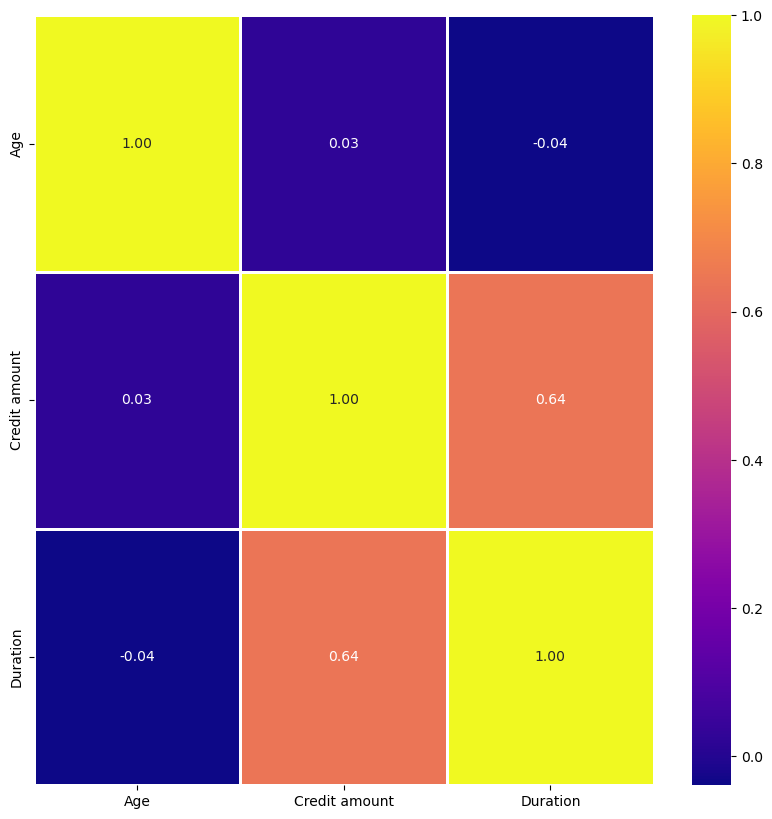

In [190]:
#la matrice de correlation entres les variables
df=data_copy
df.drop("Job",inplace=True,axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=2, fmt='.2f',cmap='plasma')

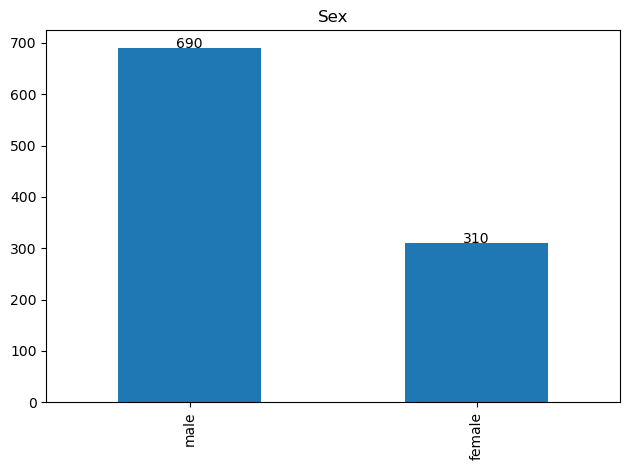

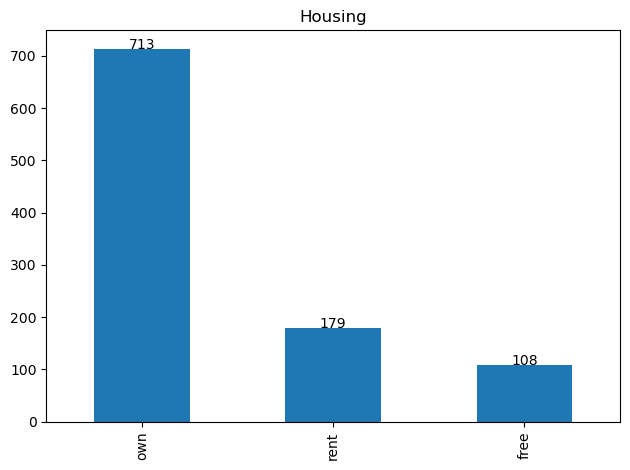

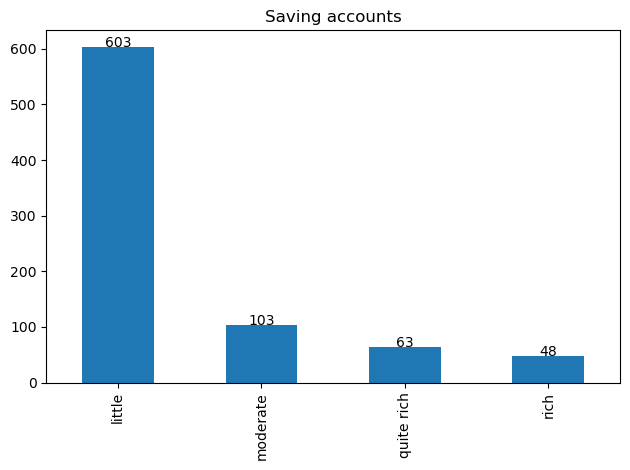

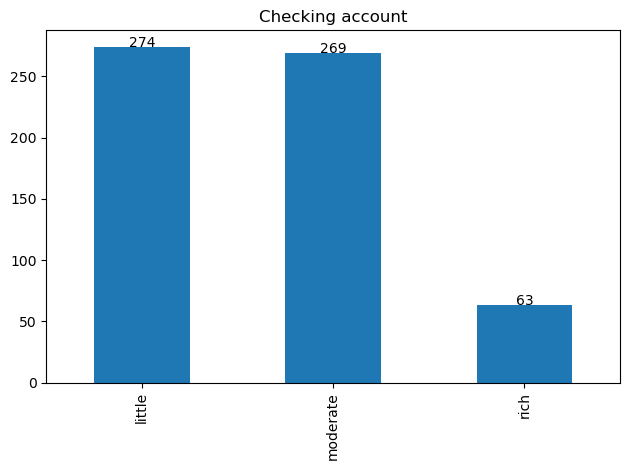

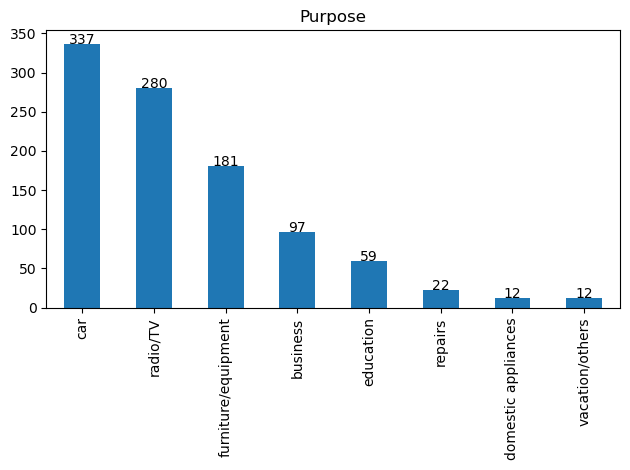

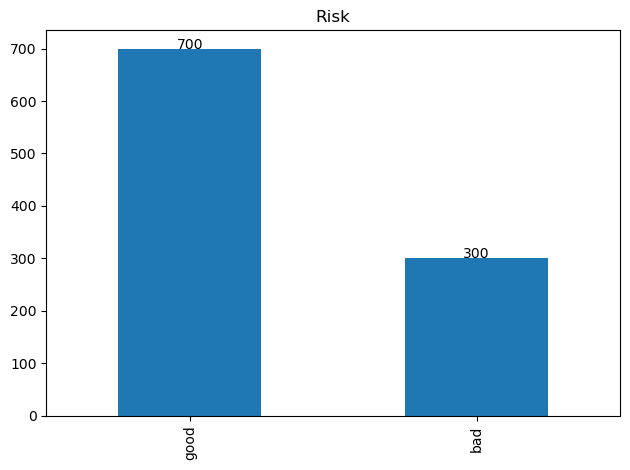

In [143]:
#visulisation des variables qualitatitive (barplot)
for col in data_copy.select_dtypes("object"):
    plt.figure()
    plt.title(col)
    fig=data_copy[col].value_counts().plot.bar()
    for i,val in enumerate(data_copy[col].value_counts()):
        fig.text(i,val,str(val),ha="center")
    plt.tight_layout()
    plt.show()


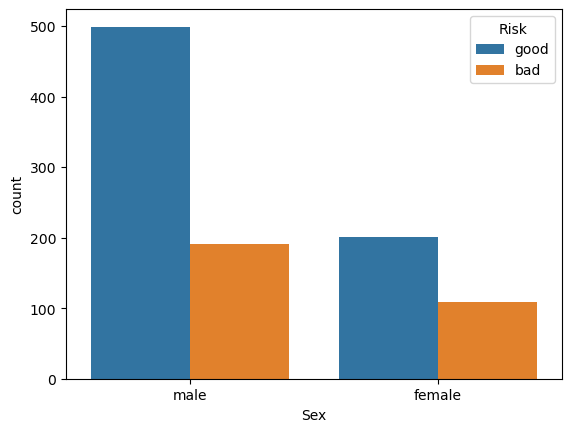

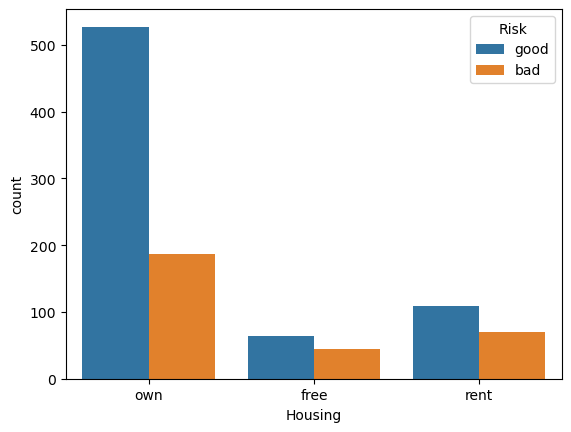

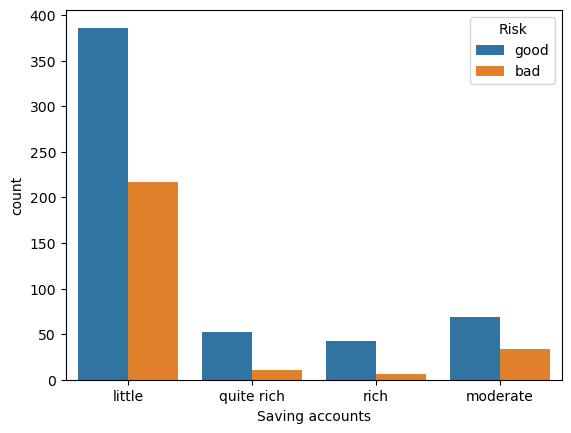

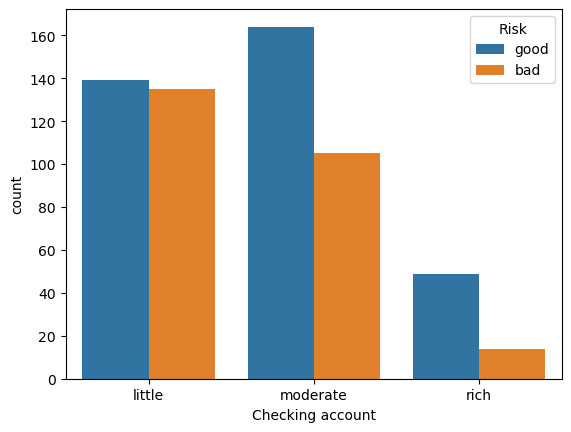

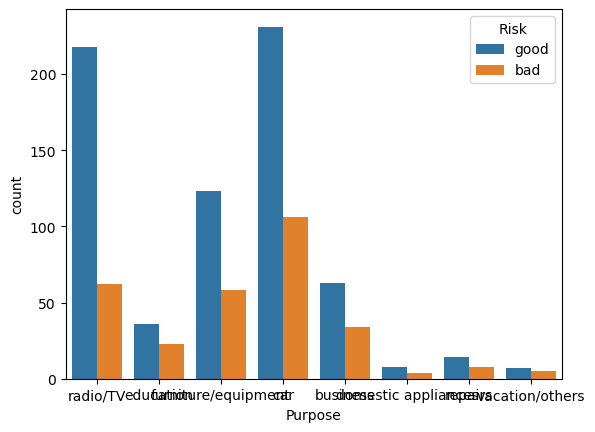

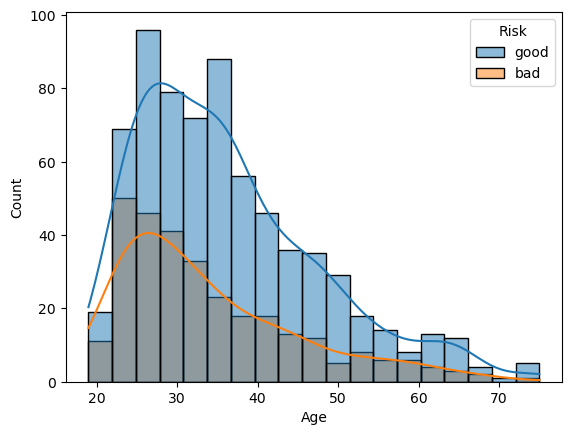

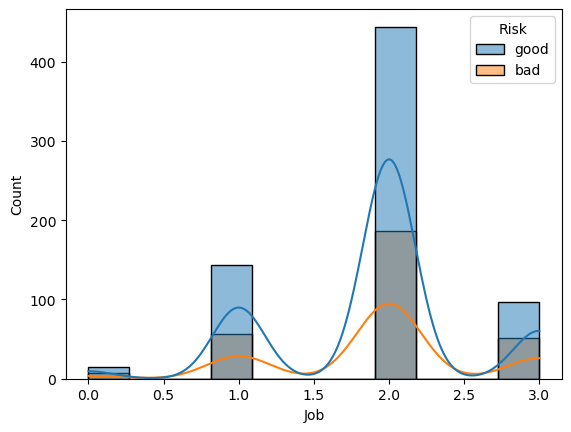

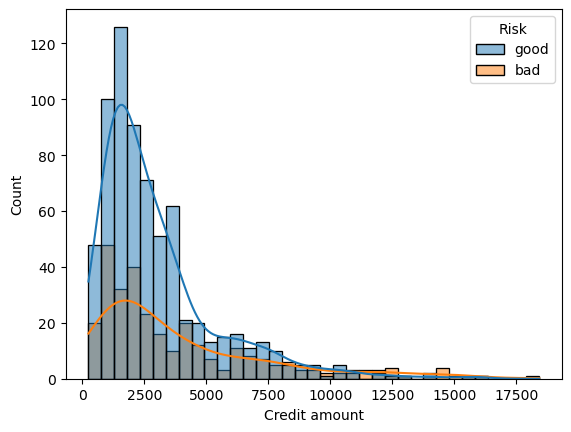

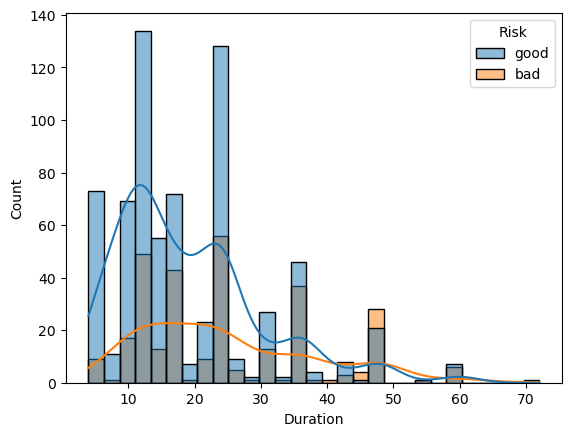

In [117]:
#Visualisation  relative à features et target

## relation var_qual et target ( countplot )
for col  in var_qual:
    plt.figure()
    sns.countplot(x=col ,data=data_copy,hue='Risk')
    plt.show()

##relation entre var_quant et target ()
for col in var_quant:
    plt.figure()
    sns.histplot(data=data,x=col,kde=True, hue="Risk")
    plt.show()


In [33]:
data_copy

,Age,Sex,Job,Housing,Duration,Purpose,Risk,Saving_accounts,Credit_amount,Checking_account
0,64,male,2,own,6,radio/TV,good,NaN,1169,little
1,22,female,2,own,42,radio/TV,bad,little,5951,moderate
2,49,male,2,own,12,education,good,little,2096,NaN
3,45,male,2,free,42,furniture/equipment,good,little,7882,little
4,53,male,2,free,24,car,bad,little,4870,little
...,...,...,...,...,...,...,...,...,...,...
995,31,female,2,own,12,furniture/equipment,good,little,1736,NaN
996,40,male,2,own,30,car,good,little,3857,little
997,38,male,2,own,12,radio/TV,good,little,804,NaN
998,23,male,2,free,42,radio/TV,bad,little,1845,little


In [119]:
var_quant.columns

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

In [120]:
var_qual.columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

In [274]:
data_copy.drop(["Job","Housing","Purpose"],axis=1,inplace=True)

## PREPROCESSING

##### Encodage & standadisation & inputation


In [12]:
data_copy

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,64,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,42,radio/TV,bad
2,49,male,2,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,2,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,2,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,42,radio/TV,bad


In [34]:
#encodage du target 
data_copy["Risk"]=data_copy["Risk"].map({"good":0,"bad":1})


In [35]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.neighbors import KNeighborsClassifier




#definition of types of features
numeric_features=['Age','Credit_amount', 'Duration']
categorical_ordinal_features=[ 'Saving_accounts','Checking_account','Job']
categorical_nominal_features=['Sex','Housing','Purpose']


#list sorted of categorical_ordinal_feature
Job_list=[0,1,2,3]
Saving_accounts_list = ['little', 'moderate', 'quite rich', 'rich']
Checking_account_list = ['little', 'moderate', 'rich']

#defintion of Pipline transformer
numeric_pipeline=Pipeline(steps=[
    ("scaller",StandardScaler())])


cat_ordinal_pipeline=Pipeline(steps=[
    ("ordinal",OrdinalEncoder(categories=[Saving_accounts_list,Checking_account_list,Job_list],handle_unknown='use_encoded_value',unknown_value=np.nan)),
    ("imputer",KNNImputer())
])


cat_nominal_pipeline=Pipeline(steps=[
    ("nominal",OneHotEncoder())
])


#fusion des pipelines
preprocessor= ColumnTransformer(transformers=[
    ("num",numeric_pipeline,numeric_features),
    ("cat_ord",cat_ordinal_pipeline,categorical_ordinal_features),
    ("cat_nom",cat_nominal_pipeline,categorical_nominal_features)
])

## MODELISATION

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report


#seperation des variables 
y=data_copy["Risk"]
x=data_copy.drop('Risk',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


#### KNN sans elimination de variables 


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

## pipeline complet avec model 
model=Pipeline(steps=[
    ("preprocess",preprocessor),
    ("KNN",KNeighborsClassifier())
])


#
param_grid={
    "KNN__n_neighbors": np.arange(1, 50),
    "KNN__weights": ["uniform", "distance"],
    "KNN__metric": ["minkowski", "euclidean", "manhattan", "chebyshev"]    
}

grid=GridSearchCV(model,param_grid=param_grid,scoring="accuracy",cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'KNN__metric': 'minkowski',
 'KNN__n_neighbors': np.int64(26),
 'KNN__weights': 'distance'}

In [38]:
model_KNN=grid.best_estimator_
y_predict=model_KNN.predict(x_test)

print("performance du model ",accuracy_score(y_test,y_predict))
print("classification")
print(classification_report(y_test,y_predict))


performance du model  0.715
classification
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       140
           1       0.60      0.15      0.24        60

    accuracy                           0.71       200
   macro avg       0.66      0.55      0.53       200
weighted avg       0.69      0.71      0.65       200



## SERIALISATION

In [39]:
import joblib
joblib.dump(model_KNN, '../model_KNN.pkl')

['../model_KNN.pkl']

### Tree Decision

In [17]:
#model complet avec gridsearchcv
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

Model_tree=Pipeline(steps=[
    ("prep",preprocessor),
    ("Tree",DecisionTreeClassifier())
])



params = {
    "Tree__criterion": ["gini", "entropy", "log_loss"],
    "Tree__max_depth": range(1, 20),  # Profondeur de l'arbre
    "Tree__min_samples_split": [2, 5, 10],
    "Tree__min_samples_leaf": [1, 2, 5, 10],
    "Tree__max_features": [None, "sqrt", "log2"],
    "Tree__splitter": ["best", "random"]
}

grid_tree=GridSearchCV(estimator=Model_tree,param_grid=params,cv=5,scoring="accuracy")
grid_tree.fit(x_train,y_train)
grid_tree.best_params_





{'Tree__criterion': 'entropy',
 'Tree__max_depth': 7,
 'Tree__max_features': 'sqrt',
 'Tree__min_samples_leaf': 10,
 'Tree__min_samples_split': 2,
 'Tree__splitter': 'best'}

In [18]:
model_tree=grid_tree.best_estimator_
y_predict=model_tree.predict(x_test)

print("performance du model ",accuracy_score(y_test,y_predict))
print("classification")
print(classification_report(y_test,y_predict))


performance du model  0.695
classification
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       140
           1       0.49      0.33      0.40        60

    accuracy                           0.69       200
   macro avg       0.62      0.59      0.60       200
weighted avg       0.67      0.69      0.68       200



<Axes: >

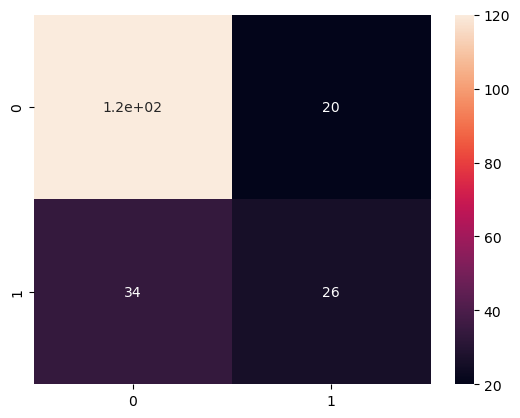

In [24]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_predict),annot=True)

## MODELISATION



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ValueError: Input y contains NaN.

In [23]:

#Normaliser les caractéristiques
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



#### KNN

In [25]:

# Paramètres de recherche
params = {
    "n_neighbors": np.arange(1, 50),
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "euclidean", "manhattan", "chebyshev"]
}

# Recherche du meilleur modèle
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=5, scoring="accuracy")
grid.fit(x_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid.best_params_)

# Évaluer le modèle optimisé
model = grid.best_estimator_
y_pred = model.predict(x_test)

print(f"Précision du modèle optimisé : {accuracy_score(y_test, y_pred):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Meilleurs hyperparamètres : {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Précision du modèle optimisé : 0.61
Rapport de classification :
              precision    recall  f1-score   support

           0       0.65      0.68      0.66        59
           1       0.56      0.52      0.54        46

    accuracy                           0.61       105
   macro avg       0.60      0.60      0.60       105
weighted avg       0.61      0.61      0.61       105



### TreeDecision

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Paramètres de recherche
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(1, 20),  # Profondeur de l'arbre
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "splitter": ["best", "random"]
}

# Initialisation du modèle
dt = DecisionTreeClassifier(random_state=42)

# Recherche du meilleur modèle
grid = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring="accuracy")
grid.fit(x_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid.best_params_)

# Évaluer le modèle optimisé
model = grid.best_estimator_
y_pred = model.predict(x_test)

print(f"Précision du modèle optimisé : {accuracy_score(y_test, y_pred):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}
Précision du modèle optimisé : 0.76
Rapport de classification :
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       142
           1       0.68      0.33      0.44        58

    accuracy                           0.76       200
   macro avg       0.73      0.63      0.64       200
weighted avg       0.75      0.76      0.73       200



### SVM

In [37]:
from sklearn.svm import SVC

# Définir un modèle de base
svm_model = SVC(random_state=50)

# Grille des hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],       # Paramètre de régularisation
    'kernel': ['linear', 'rbf'],  # Type de noyau
    'gamma': ['scale', 'auto', 0.1, 1, 10] , # Largeur pour le noyau RBF
    
}

# Configuration de GridSearchCV
grid = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # Validation croisée
    verbose=2,
    n_jobs=-1 
    
)

# Entraîner le modèle
grid.fit(x_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid.best_params_)

# Évaluer le modèle optimisé
model = grid.best_estimator_
y_pred = model.predict(x_test)

print(f"Précision du modèle optimisé : {accuracy_score(y_test, y_pred):.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Meilleurs hyperparamètres : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Précision du modèle optimisé : 0.75
Rapport de classification :
              precision    recall  f1-score   support

           0       0.78      0.89      0.84       142
           1       0.61      0.40      0.48        58

    accuracy                           0.75       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.73      0.75      0.73       200



In [27]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g